In [105]:
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
df = pd.read_csv('results/wind_tunnel.csv')
print(df)

      Angle  Wind_Speed  Lift_Calculated  Drag_Calculated  Lift_Data  \
0       0.0       27.81        -0.845193         0.183002       5.39   
1       0.0       27.63        -0.834287         0.180641       5.39   
2       0.0       27.69        -0.837915         0.181427       5.39   
3       0.0       27.81        -0.845193         0.183002       5.39   
4       0.0       27.87        -0.848844         0.183793       5.38   
...     ...         ...              ...              ...        ...   
3555  359.8       27.54        -0.552531         0.223859       5.05   
3556  359.8       27.54        -0.552531         0.223859       5.05   
3557  359.8       27.54        -0.552531         0.223859       5.05   
3558  359.8       27.60        -0.554942         0.224836       5.05   
3559  359.8       27.69        -0.558567         0.226304       5.06   

      Drag_Data  
0          0.44  
1          0.44  
2          0.44  
3          0.44  
4          0.44  
...         ...  
3555     

In [107]:
# combine angles and calculate means but keep angle as column
df = df.groupby('Angle').mean().reset_index()
df['Abs_Error_Lift'] = abs(df['Lift_Data'] - df['Lift_Calculated'])
df['Abs_Error_Drag'] = abs(df['Drag_Data'] - df['Drag_Calculated'])
df['Rel_Error_Lift'] = abs(df['Abs_Error_Lift'] / df['Lift_Data'])
df['Rel_Error_Drag'] = abs(df['Abs_Error_Drag'] / df['Drag_Data'])
print(df)

     Angle  Wind_Speed  Lift_Calculated  Drag_Calculated  Lift_Data  \
0      0.0     28.0075        -0.857286         0.185621     6.6315   
1      0.1     28.0685        -0.606874         0.172085     8.3420   
2      1.0     28.0790         1.359098         0.062473     8.6270   
3      1.1     27.6840         1.501337         0.050895     6.1685   
4      2.0     27.8975         2.915772        -0.020851     9.5385   
..     ...         ...              ...              ...        ...   
152  350.1     28.1675        -6.940753         1.171175     0.1130   
153  350.2     27.9870        -6.878894         1.148106    -1.6460   
154  355.1     27.9575        -7.102148         0.780691     4.2160   
155  355.2     27.6690        -6.918575         0.756785     1.5235   
156  359.8     27.7035        -0.559117         0.226528     5.0560   

     Drag_Data  Abs_Error_Lift  Abs_Error_Drag  Rel_Error_Lift  Rel_Error_Drag  
0      0.49625        7.488786        0.310629        1.129275    

In [120]:
df_clean = df[df['Rel_Error_Lift'] < 5]
df_clean = df_clean[df_clean['Rel_Error_Drag'] < 5]
print(df_clean)

     Angle  Wind_Speed  Lift_Calculated  Drag_Calculated  Lift_Data  \
0      0.0    28.00750        -0.857286         0.185621    6.63150   
1      0.1    28.06850        -0.606874         0.172085    8.34200   
2      1.0    28.07900         1.359098         0.062473    8.62700   
3      1.1    27.68400         1.501337         0.050895    6.16850   
4      2.0    27.89750         2.915772        -0.020851    9.53850   
..     ...         ...              ...              ...        ...   
150  340.4    27.85500        -5.236968         2.373939   -2.81050   
151  345.1    27.94825        -5.591760         1.665095   -2.07825   
153  350.2    27.98700        -6.878894         1.148106   -1.64600   
154  355.1    27.95750        -7.102148         0.780691    4.21600   
156  359.8    27.70350        -0.559117         0.226528    5.05600   

     Drag_Data  Abs_Error_Lift  Abs_Error_Drag  Rel_Error_Lift  Rel_Error_Drag  
0      0.49625        7.488786        0.310629        1.129275    

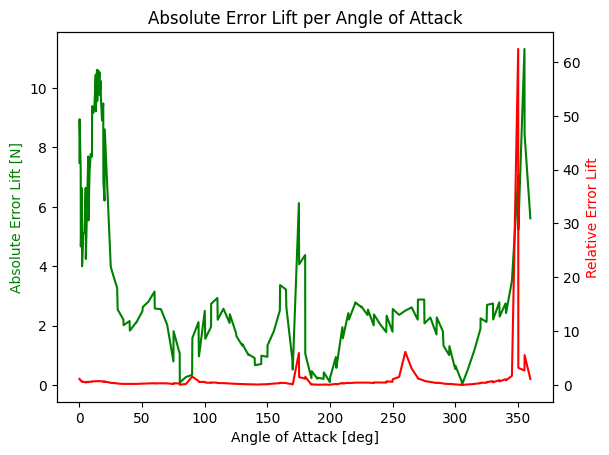

In [108]:
# error lift per angle of attack
# plot on two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df['Angle'], df['Abs_Error_Lift'], 'g-')
ax2.plot(df['Angle'], df['Rel_Error_Lift'], 'r-')
ax1.set_xlabel('Angle of Attack [deg]')
ax1.set_ylabel('Absolute Error Lift [N]', color='g')
ax2.set_ylabel('Relative Error Lift', color='r')
plt.title('Absolute Error and Relative Error Lift per Angle of Attack')
plt.show()

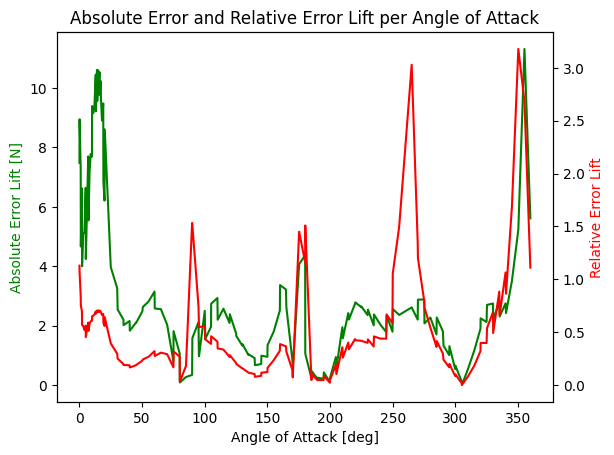

In [121]:
# error lift per angle of attack
# plot on two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_clean['Angle'], df_clean['Abs_Error_Lift'], 'g-')
ax2.plot(df_clean['Angle'], df_clean['Rel_Error_Lift'], 'r-')
ax1.set_xlabel('Angle of Attack [deg]')
ax1.set_ylabel('Absolute Error Lift [N]', color='g')
ax2.set_ylabel('Relative Error Lift', color='r')
plt.title('Absolute Error and Relative Error Lift per Angle of Attack')
plt.show()

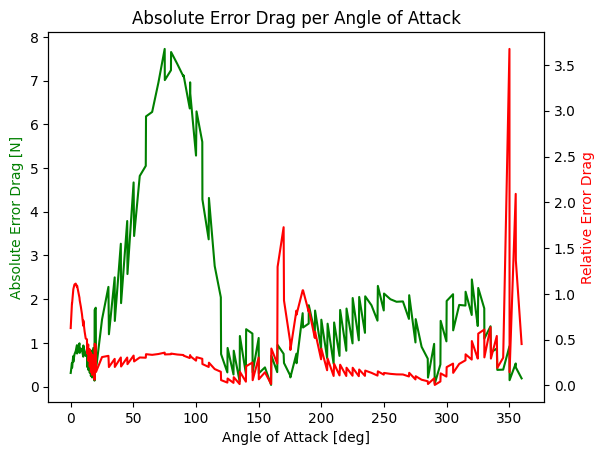

In [109]:
# absolute error drag per angle of attack
df_error_drag = pd.DataFrame()
# plot on two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df['Angle'], df['Abs_Error_Drag'], 'g-')
ax2.plot(df['Angle'], df['Rel_Error_Drag'], 'r-')
ax1.set_xlabel('Angle of Attack [deg]')
ax1.set_ylabel('Absolute Error Drag [N]', color='g')
ax2.set_ylabel('Relative Error Drag', color='r')
plt.title('Absolute Error and Relative Error Drag per Angle of Attack')

plt.show()

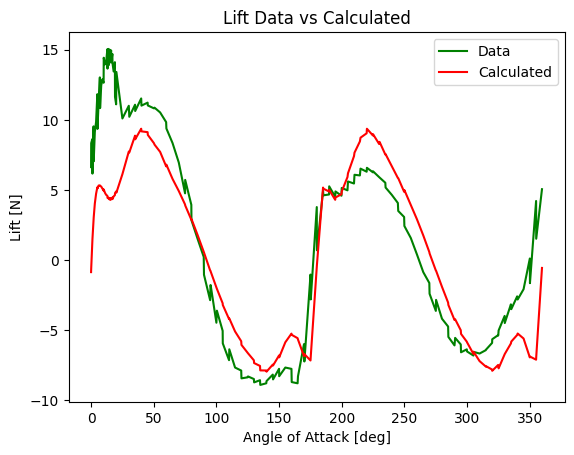

In [110]:
# plot calc lift vs data lift for all angles 
# put angle on x-axis and lift on y-axis
plt.plot(df['Angle'], df['Lift_Data'], 'g-', label='Data')
plt.plot(df['Angle'], df['Lift_Calculated'], 'r-', label='Calculated')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Lift [N]')
plt.legend()
plt.title('Lift Data vs Calculated')


plt.show()

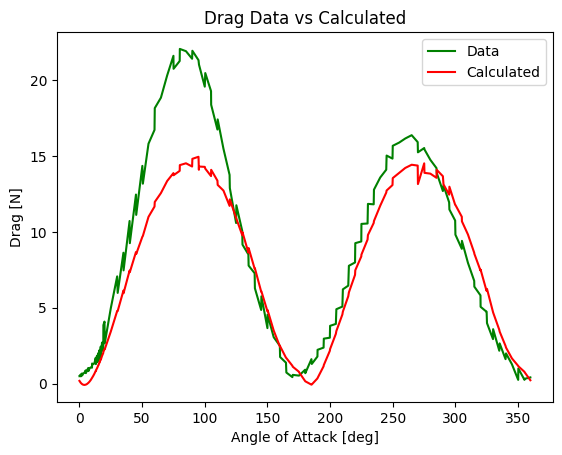

In [111]:
# plot calc drag vs data drag for all angles
# put angle on x-axis and drag on y-axis
plt.plot(df['Angle'], df['Drag_Data'], 'g-', label='Data')
plt.plot(df['Angle'], df['Drag_Calculated'], 'r-', label='Calculated')
plt.xlabel('Angle of Attack [deg]')
plt.ylabel('Drag [N]')
plt.legend()
plt.title('Drag Data vs Calculated')
plt.show()


In [112]:
# print outliers
print(df[df['Rel_Error_Lift'] > 10])

     Angle  Wind_Speed  Lift_Calculated  Drag_Calculated  Lift_Data  \
152  350.1     28.1675        -6.940753         1.171175      0.113   

     Drag_Data  Abs_Error_Lift  Abs_Error_Drag  Rel_Error_Lift  Rel_Error_Drag  
152     0.2505        7.053753        0.920675       62.422591        3.675349  


In [115]:
outlier = df.iloc[152]
print(outlier)
print("Angle: ", outlier['Angle'])
print("Lift Data: ", outlier['Lift_Data'])
print("Lift Calculated: ", outlier['Lift_Calculated'])
print("Abs Error Lift: ", abs(outlier['Lift_Data'] - outlier['Lift_Calculated']))
print("Rel Error Lift: ", abs(abs(outlier['Lift_Data'] - outlier['Lift_Calculated']) / outlier['Lift_Data']))

Angle              350.100000
Wind_Speed          28.167500
Lift_Calculated     -6.940753
Drag_Calculated      1.171175
Lift_Data            0.113000
Drag_Data            0.250500
Abs_Error_Lift       7.053753
Abs_Error_Drag       0.920675
Rel_Error_Lift      62.422591
Rel_Error_Drag       3.675349
Name: 152, dtype: float64
Angle:  350.1
Lift Data:  0.11299999999999999
Lift Calculated:  -6.940752755212148
Abs Error Lift:  7.053752755212148
Rel Error Lift:  62.42259075408981
